In [2705]:
var("x,y");

Definim els sistema d'equacions que estudiarem

In [2706]:
eq1=-y+2*x*y+y*y

In [2707]:
eq2=x+x*x+2*x*y-y*y

In [2708]:
sol=solve([eq1,eq2],x,y);sol

[[x == -1, y == 0], [x == 0, y == 0], [x == -1/14*sqrt(21) + 1/2, y == 1/7*sqrt(21)], [x == 1/14*sqrt(21) + 1/2, y == -1/7*sqrt(21)]]

Guardem els 4 punts d'equilibri.


In [2709]:
px1=sol[0][0].rhs();
py1=sol[0][1].rhs();
px2=sol[1][0].rhs();
py2=sol[1][1].rhs();
px3=sol[2][0].rhs();
py3=sol[2][1].rhs();
px4=sol[3][0].rhs();
py4=sol[3][1].rhs();

En aquest cas no hi ha cap punt d'equilibri complex, de manera que no descartem cap.

In [2710]:
qx=min(px1,px2,px3,px4);qx
qy=min(py1,py2,py3,py4);qy

-1/7*sqrt(21)

Dibuixem el camp vectorial.

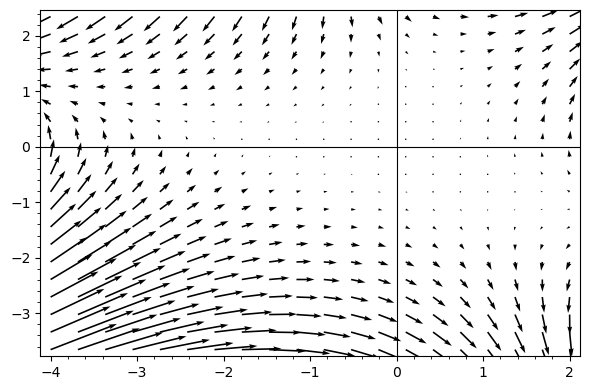

In [2711]:
plot=plot_vector_field((eq1,eq2), (x,qx-3,qx+3), (y,qy-3,qy+3));plot

Equacions en funció de t

In [2712]:
var("t");
x1=function("x1")(t);
y1=function("y1")(t);
eqd1=diff(x1(t),t)==eq1.subs(x=x1(t),y=y1(t));
eqd2=diff(y1(t),t)==eq2.subs(x=x1(t),y=y1(t));
show(eqd1)
show(eqd2)

diff(x1(t), t) == 2*x1(t)*y1(t) + y1(t)^2 - y1(t)

diff(y1(t), t) == x1(t)^2 + 2*x1(t)*y1(t) - y1(t)^2 + x1(t)

Fem l'estudi de cada punt singular a partir del càlculs dels ceos de la matriu diferencial o Jacobià a cada punt d'equilibri trobat.

In [2713]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]);A

[          2*y 2*x + 2*y - 1]
[2*x + 2*y + 1     2*x - 2*y]

Estudi del punt (-1,0)

In [2714]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[ 0 -3]
[-1 -2]

In [2715]:
A.eigenvalues()

[-3, 1]

En aquest cas ens trobem amb dos vaps de signe diferent, per tant podem deduir per teorema de hartmann-grobmann que ens trobem en un punt de sella en el qual l'eix de les x serà atractor i l'eix y repulsor, definint eix x i eix y com la recta que representa el veps de cada vap trobat

Busquem les seves separatrius.

Per la primera separatriu

In [2716]:
px=px1;py=py1;
vec=A.eigenvectors_right();vec

[(-3, [(1, 1)], 1), (1, [(1, -1/3)], 1)]

Ens desplacem positivament del vector propi

In [2717]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi
step1=0.01 # El pas de integració
kt=2.6;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

Mirem part de la solució i indiquem en color blau si aquesta part de la solució és estable o no, és a dir si es atractor (Blau) o repulsor (Vermell).


In [2718]:
sol1=[[j,k] for i,j,k in sol]
if(vec[0][0]<0):
    sep1=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep1=list_plot(sol1,color="red")

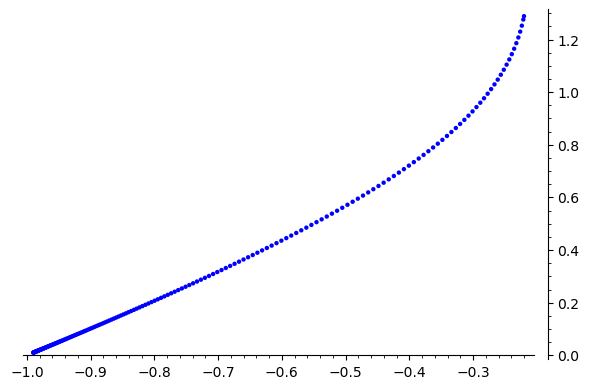

In [2719]:
show(sep1)

Ens desplacem negativament del vector propi

In [2720]:
kt=2;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2721]:
sol1=[[j,k] for i,j,k in sol]

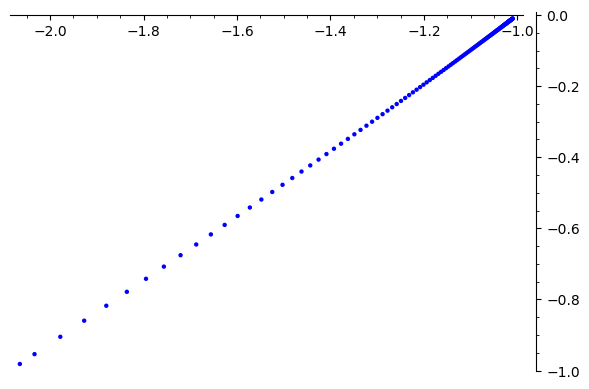

In [2722]:
if(vec[0][0]<0):
    sep2=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep2=list_plot(sol1,color="red")
show(sep2)

Per la segona separatriu

In [2723]:
kt=9;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2724]:
sol1=[[j,k] for i,j,k in sol]

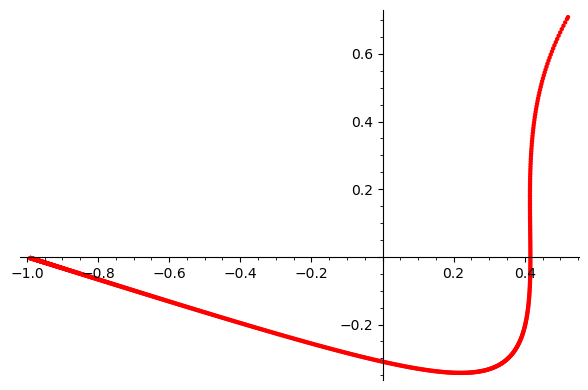

In [2725]:
if(vec[1][0]<0):
    sep3=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep3=list_plot(sol1,color="red")
show(sep3)

In [2726]:
kt=5;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2727]:
sol1=[[j,k] for i,j,k in sol]

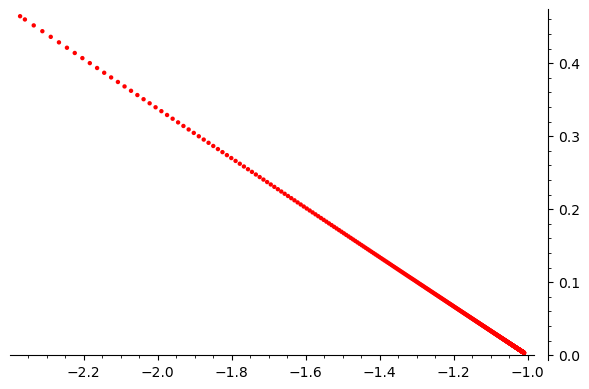

In [2728]:
if(vec[1][0]<0):
    sep4=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep4=list_plot(sol1,color="red")
show(sep4)

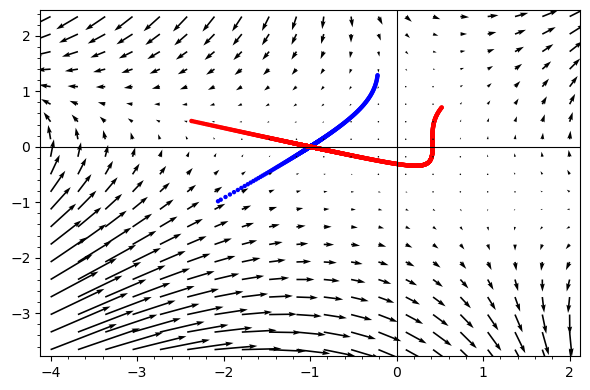

In [2729]:
tot=sep1+sep2+sep3+sep4+plot
show(tot)

Matriu per al punt (0,0)

In [2730]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px2,y=py2);A

[ 0 -1]
[ 1  0]

In [2731]:
A.eigenvalues()

[-I, I]

Vaps complexes amb part real = 0, no sabem si pot ser un centre o un focus

In [2732]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px3,y=py3);A

[     2/7*sqrt(21)      1/7*sqrt(21)]
[ 1/7*sqrt(21) + 2 -3/7*sqrt(21) + 1]

In [2733]:
A.eigenvalues()
show(A.eigenvalues()[0].n())
show(A.eigenvalues()[1].n())

-1.56796350674434

1.91330983603636

Aquest punt també és una sellla. Fem igual que en primer cas.

In [2734]:
px=px3;py=py3;

In [2735]:
vec=A.eigenvectors_right();vec

[(-1/14*sqrt(21) - 1/14*sqrt(-14*sqrt(21) + 658) + 1/2,
  [(1, -1/42*sqrt(21)*sqrt(-14*sqrt(21) + 658) + 1/6*sqrt(21) - 5/2)],
  1),
 (-1/14*sqrt(21) + 1/14*sqrt(-14*sqrt(21) + 658) + 1/2,
  [(1, 1/42*sqrt(21)*sqrt(-14*sqrt(21) + 658) + 1/6*sqrt(21) - 5/2)],
  1)]

In [2736]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi
step1=0.01 # El pas de integració



In [2737]:
kt=30;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2738]:
sol1=[[j,k] for i,j,k in sol]

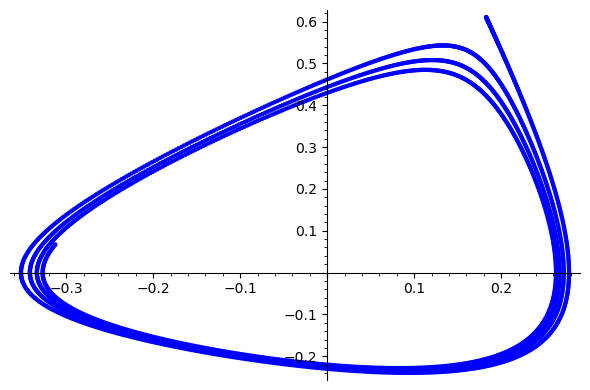

In [2739]:
if(vec[0][0]<0):
    sep5=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep5=list_plot(sol1,color="red")
sep5

In [2740]:
kt=2;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2741]:
sol1=[[j,k] for i,j,k in sol]

In [2742]:
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")

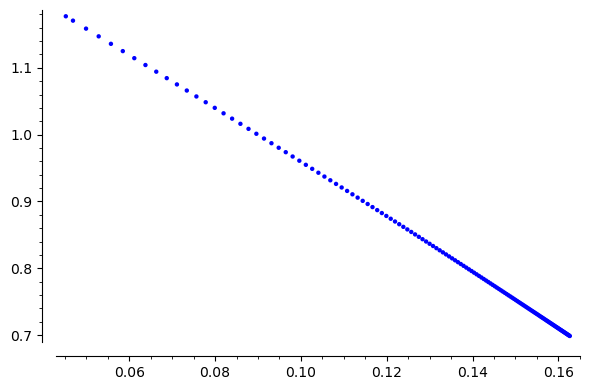

In [2743]:
sep6

In [2744]:
kt=10;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2745]:
sol1=[[j,k] for i,j,k in sol]

In [2746]:
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")

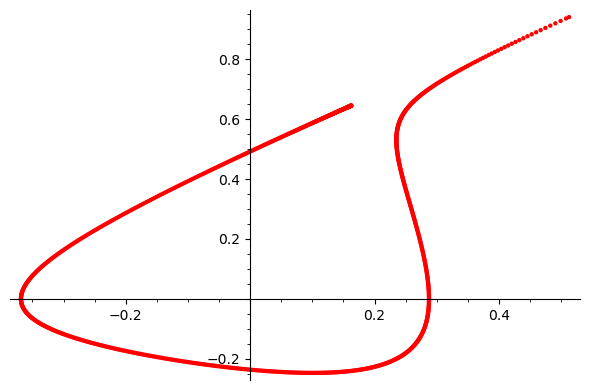

In [2747]:
sep7

In [2748]:
kt=2;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2749]:
sol1=[[j,k] for i,j,k in sol]

In [2750]:
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")

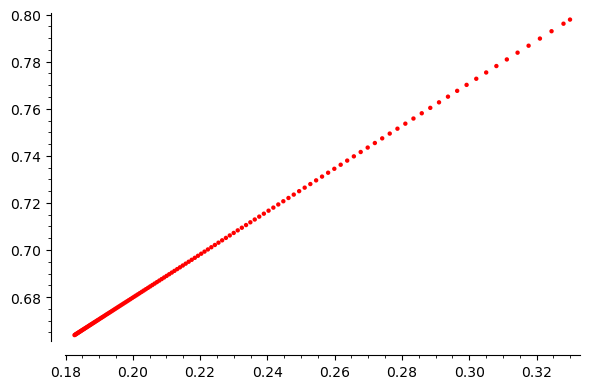

In [2751]:
sep8

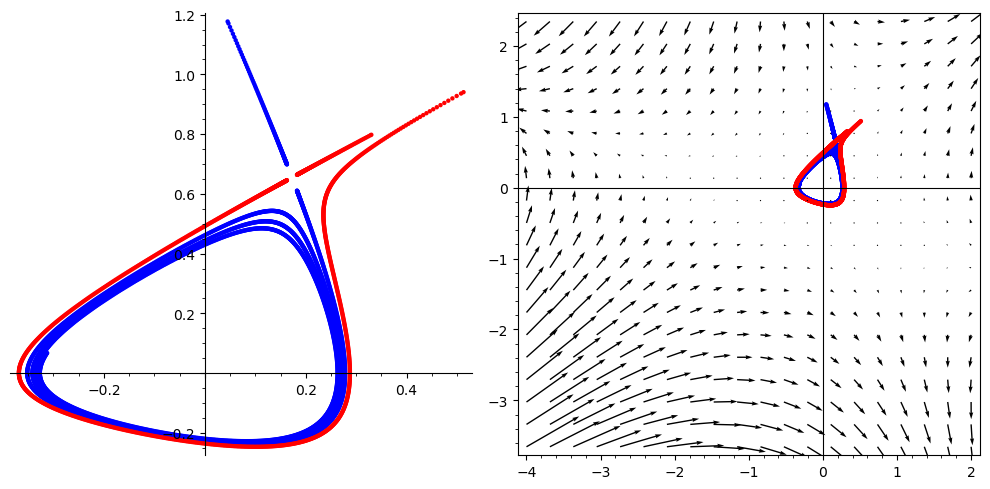

In [2752]:
tot2=sep5+sep6+sep7+sep8
tot2vect=tot2+plot
graphics_array([tot2,tot2vect]).show(figsize=(10,5))

Mirem conjuntament amb l'altre sella

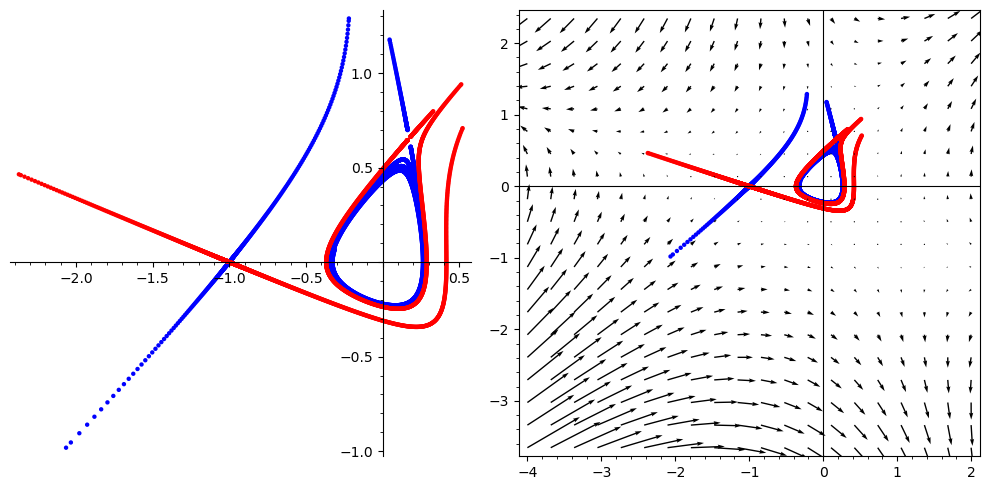

In [2753]:
sella12=sep1+sep2+sep3+sep4+tot2;total
sella12vect=sep1+sep2+sep3+sep4+tot2vect;
graphics_array([sella12,sella12vect]).show(figsize=(10,5))

Analitzem el punt 4

In [2754]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px4,y=py4);A

[    -2/7*sqrt(21)     -1/7*sqrt(21)]
[-1/7*sqrt(21) + 2  3/7*sqrt(21) + 1]

In [2755]:
A.eigenvalues()
show(A.eigenvalues()[0].n())
show(A.eigenvalues()[1].n())

-1.09217041457810

2.74682408528608

Tenim una altre sella com en el punt 1 i en el punt 2. Realitzem el mateix procediment

In [2756]:
px=px4;py=py4;

In [2757]:
vec=A.eigenvectors_right();vec

[(1/14*sqrt(21) - 1/14*sqrt(14*sqrt(21) + 658) + 1/2,
  [(1, 1/42*sqrt(21)*sqrt(14*sqrt(21) + 658) - 1/6*sqrt(21) - 5/2)],
  1),
 (1/14*sqrt(21) + 1/14*sqrt(14*sqrt(21) + 658) + 1/2,
  [(1, -1/42*sqrt(21)*sqrt(14*sqrt(21) + 658) - 1/6*sqrt(21) - 5/2)],
  1)]

In [2758]:
kt=4;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2759]:
sol1=[[j,k] for i,j,k in sol]

In [2760]:
if(vec[0][0]<0):
    sep9=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep9=list_plot(sol1,color="red")

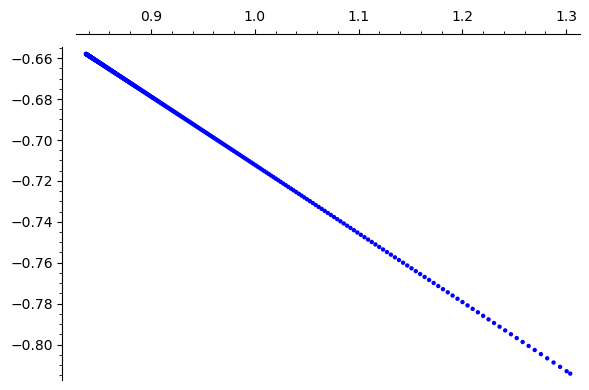

In [2761]:
sep9

In [2762]:
kt=6.7;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2763]:
sol1=[[j,k] for i,j,k in sol]

In [2764]:
if(vec[0][0]<0):
    sep10=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep10=list_plot(sol1,color="red")

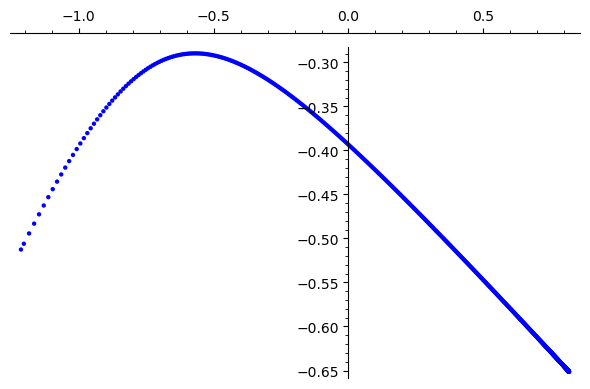

In [2765]:
sep10

In [2766]:
kt=0.05;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2767]:
sol1=[[j,k] for i,j,k in sol]

In [2768]:
if(vec[1][0]<0):
    sep11=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep11=list_plot(sol1,color="red")

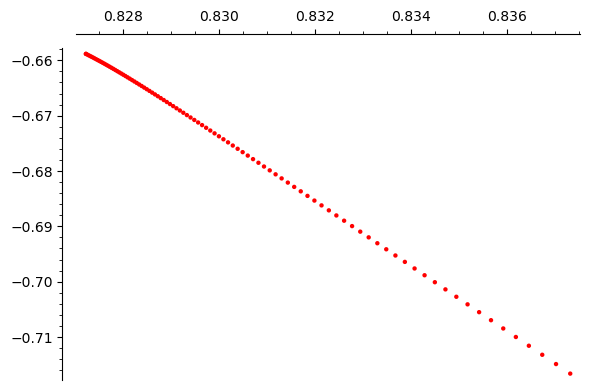

In [2769]:
sep11

In [2770]:
kt=2;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2771]:
sol1=[[j,k] for i,j,k in sol]

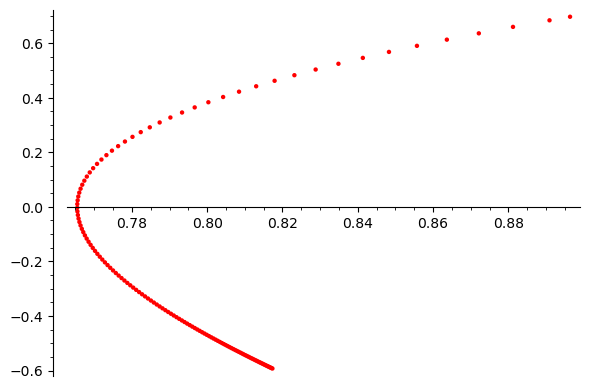

In [2772]:
if(vec[1][0]<0):
    sep12=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep12=list_plot(sol1,color="red")
sep12

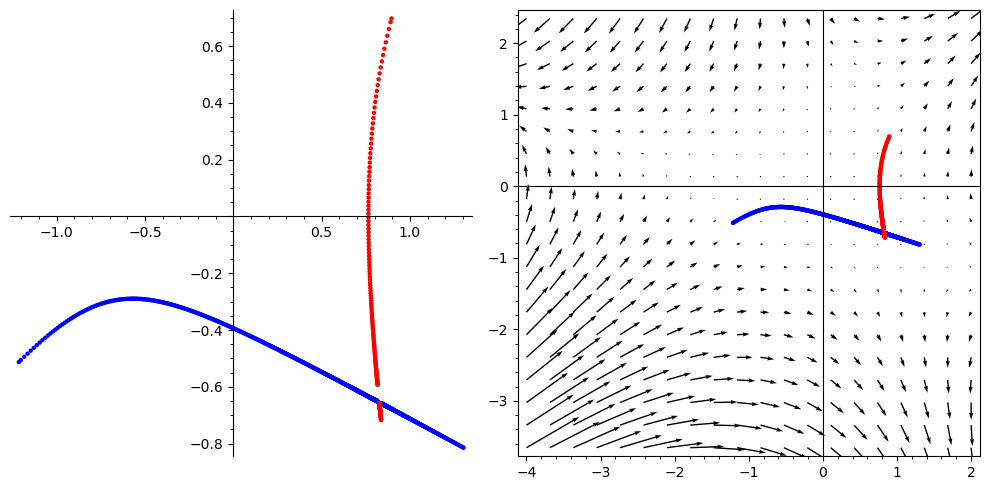

In [2773]:
sellap4vect=sep9+sep10+sep11+sep12+plot;
graphics_array([sellap4,sellap4vect]).show(figsize=(10,5))

Mirem les 3 selles juntes

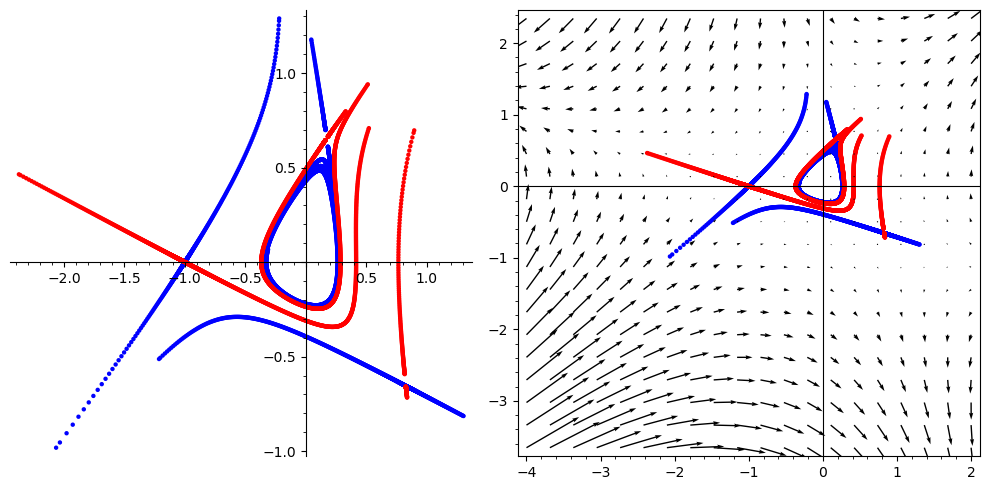

In [2774]:
totalselles=sellap4+sella12;
totalsellesvect=totalselles+plot;
graphics_array([totalselles,totalsellesvect]).show(figsize=(10,5))


Ara hem de mirar el comportament del punt d'equilibri que ens ha donat un vap complex i que no hem classificat anterioirment.
Ara que sabem com es comporta qualsevol punt al sistema, podem saber quin serà el seu comportament.

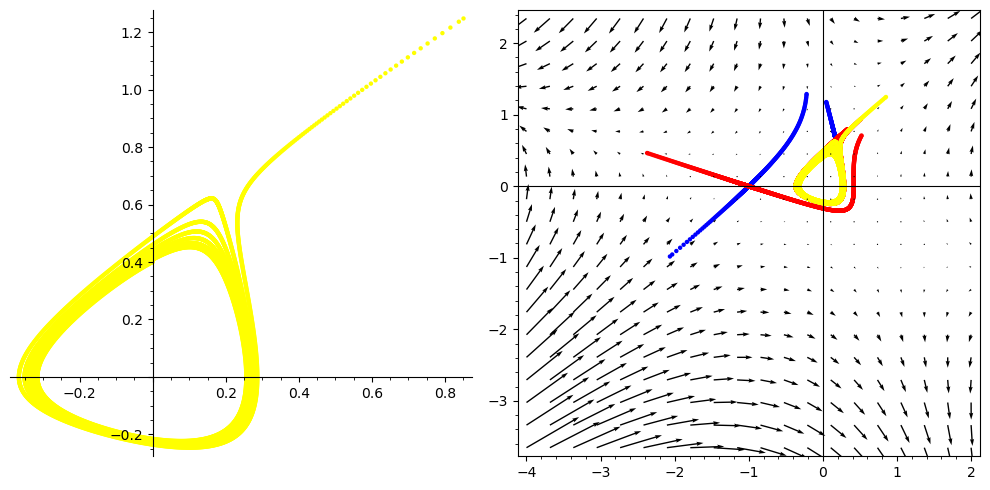

In [2775]:
px=0;py=0.4;kt=56;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb1=list_plot(sol1,color="yellow")
sistema=plot+sep1+sep2+sep3+sep4+sep5+sep6+sep7+sep8+orb1
graphics_array([orb1,sistema]).show(figsize=(10,5))

In [2776]:
kt=3;sol=desolve_system_rk4([-eq1, -eq2],[x,y],ics=[0.2,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [2777]:
sol1=[[j,k] for i,j,k in sol]

In [2778]:
orb2=list_plot(sol1,color="yellow")

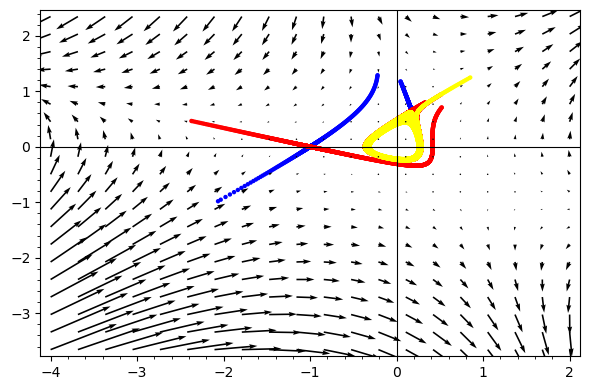

In [2779]:
plot+sep1+sep2+sep3+sep4+sep5+sep6+sep7+sep8+orb1+orb2

Finalment, podem determinar que el punt d'equilibri amb els vaps compexes es comprta com és node repuolsor un cop hem dibuixant la orbita groga.